In [1]:
import numpy as np    # linear algebra
import pandas as pd   # data processing
import matplotlib.pyplot as plt   # data visualization
import cv2            # image processing

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import os

Immutils is a series of convenience functions to make basic image processing functions such as translation, rotation, resizing and display matplotlib images easier with OpenCV.

In [3]:
pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=d2a06476c2e8fe5acf91476aedfbb6867c25ccc15b461dcde178542ea351f9a9
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


grap the image paths and list them

In [4]:
from imutils import paths
image_paths = list(paths.list_images('../input/leaf-count'))

we create data list and label list in the feature we use them for training

In [5]:
x='../input/leaf-count/1/1.png'
y=x.split(os.path.sep)[-2]

In [6]:
data = []
labels = []
label_names = []


for i in image_paths:
    image = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(80,80))
    data.append(image)
    label = i.split(os.path.sep)[-2]
    labels.append(label)
    label_names.append(label)

In [93]:
import matplotlib.pyplot as plt

In [99]:
image1 = cv2.imread("../input/leaf-count/3/10.png")
image1 = cv2.resize(image1, (80,80))
image2 = cv2.imread("../input/leaf-count/2/100.png")
image2 = cv2.resize(image2, (80,80))
image3 = cv2.imread("../input/leaf-count/1/106.png")
image3 = cv2.resize(image3, (80,80))
image4 = cv2.imread("../input/leaf-count/6/107.png")
image4 = cv2.resize(image4, (80,80))

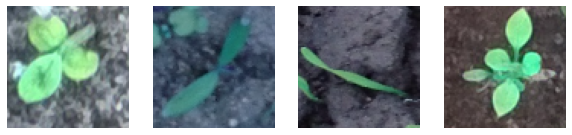

In [103]:
fig=plt.figure(figsize=(10, 10))
image = [image1,image2,image3,image4]

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(image[i])
    plt.axis('off')

plt.show()

In [106]:
image1.shape

(80, 80, 3)

We arrange the data of the list type into an array.

In [9]:
data2 = np.array(data)
labels2 = np.array(labels)

Label encoder enables us to convert categorical paramaters to numerical paramaters. Numarical paramaters are useful for training algorithm.
The purpose of encoding label values is to ensure that the class with label value 9 does not appear to be more important than the class with label value 1.

In [10]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels2 = lb.fit_transform(labels2)
print(f"total class number:{len(lb.classes_)}")

total class number:9


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
(X, x_val , Y, y_val) = train_test_split(data2, labels2, 
                                                    test_size=0.2,  
                                                    stratify=labels2,
                                                    random_state=0)

In [13]:
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, 
                                                    test_size=0.25, 
                                                    random_state=0)

In [14]:
print(f"x_train examples: {x_train.shape}\n x_test examples: {x_test.shape}\n x_val examples: {x_val.shape}")

x_train examples: (5622, 80, 80)
 x_test examples: (1875, 80, 80)
 x_val examples: (1875, 80, 80)


In [15]:
print(x_train.shape,y_train.shape)

(5622, 80, 80) (5622, 9)


In [16]:
x_train2 = np.array(x_train)/255
x_train2 = x_train.reshape(-1,80,80,1)
y_train2 = np.array(y_train)

In [17]:
x_val2 = np.array(x_val)/255.0
x_val2 = x_val.reshape(-1,80,80,1)
y_val2 = np.array(y_val)

In [18]:
print(x_train2.shape,y_train2.shape)

(5622, 80, 80, 1) (5622, 9)


In [19]:
x_val2.shape

(1875, 80, 80, 1)

In [20]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding ="same", activation = 'relu', input_shape=(80,80,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 128)         0

In [22]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [23]:
history = model.fit(x_train2, y_train2, epochs=100, batch_size=32, validation_data = (x_val2, y_val2),verbose=1)

Epoch 1/100
176/176 [==============================] - 43s 243ms/step - loss: 3.1929 - accuracy: 0.3260 - val_loss: 1.7724 - val_accuracy: 0.3515
Epoch 2/100
176/176 [==============================] - 41s 235ms/step - loss: 1.7674 - accuracy: 0.3536 - val_loss: 1.7612 - val_accuracy: 0.3445
Epoch 3/100
176/176 [==============================] - 41s 233ms/step - loss: 1.7542 - accuracy: 0.3589 - val_loss: 1.7799 - val_accuracy: 0.3765
Epoch 4/100
176/176 [==============================] - 42s 237ms/step - loss: 1.6970 - accuracy: 0.3726 - val_loss: 1.7128 - val_accuracy: 0.3792
Epoch 5/100
176/176 [==============================] - 41s 234ms/step - loss: 1.6208 - accuracy: 0.3970 - val_loss: 1.7001 - val_accuracy: 0.3989
Epoch 6/100
176/176 [==============================] - 41s 235ms/step - loss: 1.5865 - accuracy: 0.4210 - val_loss: 1.7432 - val_accuracy: 0.3909
Epoch 7/100
176/176 [==============================] - 42s 238ms/step - loss: 1.5376 - accuracy: 0.4361 - val_loss: 1.7684 -

Epoch 57/100
176/176 [==============================] - 41s 236ms/step - loss: 0.1947 - accuracy: 0.9427 - val_loss: 4.3020 - val_accuracy: 0.4283
Epoch 58/100
176/176 [==============================] - 41s 231ms/step - loss: 0.2156 - accuracy: 0.9353 - val_loss: 4.0167 - val_accuracy: 0.4192
Epoch 59/100
176/176 [==============================] - 42s 236ms/step - loss: 0.1930 - accuracy: 0.9422 - val_loss: 4.5986 - val_accuracy: 0.4277
Epoch 60/100
176/176 [==============================] - 41s 234ms/step - loss: 0.1718 - accuracy: 0.9465 - val_loss: 4.3950 - val_accuracy: 0.4160
Epoch 61/100
176/176 [==============================] - 44s 249ms/step - loss: 0.1664 - accuracy: 0.9470 - val_loss: 4.3669 - val_accuracy: 0.4128
Epoch 62/100
176/176 [==============================] - 42s 238ms/step - loss: 0.1823 - accuracy: 0.9413 - val_loss: 4.4974 - val_accuracy: 0.4304
Epoch 63/100
176/176 [==============================] - 41s 235ms/step - loss: 0.1867 - accuracy: 0.9427 - val_loss: 4

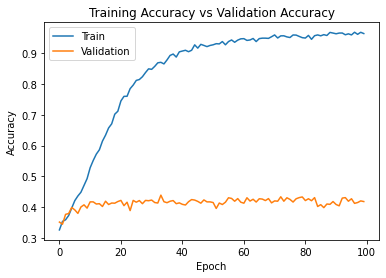

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

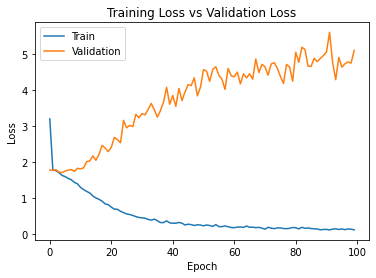

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

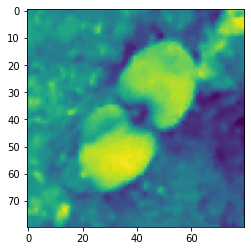

In [111]:
image3 = cv2.imread("../input/leaf-count/2/10.png")
image3 = cv2.resize(image3, (80,80))
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
x= image3.reshape(1,80,80,1)
x.shape
plt.imshow(image3)

[[1.3292706e-08 9.9998736e-01 1.1029414e-05 1.5367239e-06 1.6763636e-08
  2.2388718e-11 3.5196625e-14 1.1268784e-17 2.0230289e-12]]


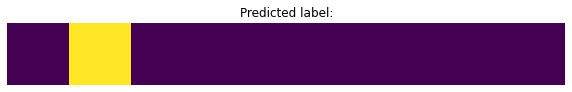

In [112]:
plt.figure(figsize=(10, 10))

predictions = model.predict(x)
print(predictions)
#ax = plt.subplot(10, 4)
plt.imshow(predictions)
plt.title('Predicted label:')
plt.axis('off')
plt.grid(True)

Text(0.5, 0, 'Leaf count predictions')

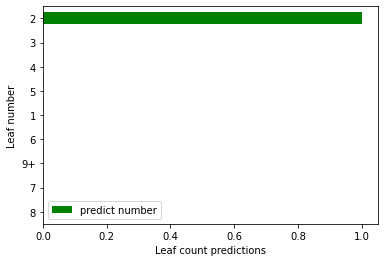

In [113]:
df1 = pd.DataFrame(predictions)
df2 = df1.T
df2.columns = ['predict number']
df2['Leaf number'] = ['1','2','3','4','5','6','7','8','9+']

df2[["predict number","Leaf number"]].groupby(["Leaf number"], 
                                    as_index = True).mean().sort_values(by = "predict number",
               axis = 0,
               ascending = True).plot(kind="barh",color="green")
plt.xlabel("Leaf count predictions")